### 실습과제 : Logistic regression with MNIST dataset

In [42]:
%matplotlib inline
import warnings
import sklearn.linear_model as skl_lm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from random import sample
from sklearn.metrics import confusion_matrix,\
    precision_score, accuracy_score, f1_score, recall_score

warnings.filterwarnings(action='ignore')

In [2]:
# Downloading MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('MNIST_784', version = 1, cache=True)

In [26]:
#1. mnist image data와 target data의 shape을 출력하라.
#Hint : mnist.data / mnist.target
# data: 28*28 이미지, target은 label
data = mnist.data
label = mnist.target

In [27]:
#1. your code here
print(f"Image data shape: {data.shape}")
print(f"Label data shape: {label.shape}")

Image data shape: (70000, 784)
Label data shape: (70000,)


In [56]:
#2. 각 Label별 개수를 파악하라.
#Hint: Use np.unique(data, return_counts=True)

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958],
       dtype=int64))

In [28]:
#2. your code here
np.unique(label, return_counts=True)

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]))

In [10]:
#3. Training, Test set를 구성하고 numpy array type으로 변환할 것.
#Hint :
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl =

train_img = train_img.values
train_lbl = train_lbl.values
test_img = test_img.values
test_lbl = test_lbl.values

# train_img, train_label, test_img, test_label의 shape를 각각 출력하라. (test_size = 0.3)

Train Image Data Shape (49000, 784)
Train Label data Shape (49000,)
Test Image Data Shape (21000, 784)
Test Label data Shape (21000,)


In [29]:
#3. your code here
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(data, label, test_size=0.3, random_state=11)

train_img = train_img.values
train_lbl = train_lbl.values
test_img = test_img.values
test_lbl = test_lbl.values

print(f"Train Image Data Shape: {train_img.shape}")
print(f"Train Label Data Shape: {train_lbl.shape}")
print(f"Test Image Data Shape: {test_img.shape}")
print(f"Test Label Data Shape: {test_lbl.shape}")

Train Image Data Shape: (49000, 784)
Train Label Data Shape: (49000,)
Test Image Data Shape: (21000, 784)
Test Label Data Shape: (21000,)


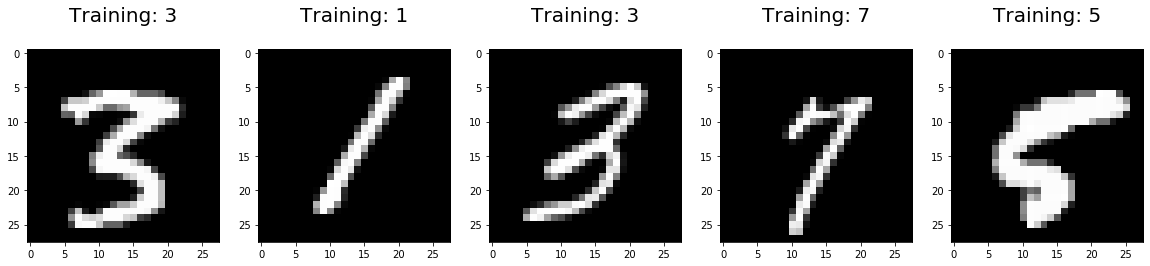

In [58]:
#4. Train set에서 5개의 image 데이터를 출력하라.
#Hint:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for , (  , ) in enumerate(zip(   ,    )):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title(f'Training: {label}\n', fontsize = 20)

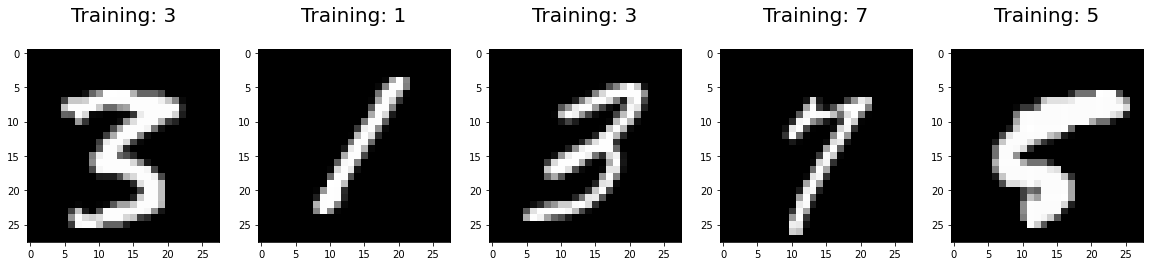

In [32]:
#4. your code here
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img, train_lbl)):
    if index > 4:
        break
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title(f'Training: {label}\n', fontsize = 20)

In [11]:
#5. LogisticRegression model를 학습하라.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
#5. your code here
clf = skl_lm.LogisticRegression(solver='lbfgs', penalty='l2')
clf.fit(train_img, train_lbl)

LogisticRegression()

Model Performance Evaluation

In [12]:
#6. Accuracy를 계산하라.

Train acc : 0.9361020408163265
Test acc : 0.9187142857142857


In [36]:
#6. your code here
y_train_pred = clf.predict(train_img)
y_test_pred = clf.predict(test_img)
print(f"Train acc: {accuracy_score(train_lbl, y_train_pred)}")
print(f"Test acc: {accuracy_score(test_lbl, y_test_pred)}")

Train acc: 0.9361020408163265
Test acc: 0.9187142857142857


In [61]:
#7. Confusion matrix를 출력하라.

Confusion matrix :
[[1985    0   10    4    6   23   15    1   13    2]
 [   0 2246    9    8    3    7    4    4   26    3]
 [   9   20 1868   32   24    9   24   25   63    8]
 [   8   10   47 1912    1   70    5   23   49   28]
 [   6    4   19    3 1855    6   22    6   12   57]
 [  26    1   15   76   24 1661   35    7   64   10]
 [  16    2   24    1   23   27 2002    4    6    2]
 [   6   12   26    9   27    3    1 2058    6   58]
 [  13   33   20   55   12   61   18   11 1824   27]
 [  16   10    6   27   51   18    0   71   19 1882]]


In [37]:
#7. your code here
print(f"Confusion matrix: \n{confusion_matrix(test_lbl, y_test_pred)}")

Confusion matrix: 
[[1985    0   10    4    6   23   15    1   13    2]
 [   0 2246    9    8    3    7    4    4   26    3]
 [   9   20 1868   32   24    9   24   25   63    8]
 [   8   10   47 1912    1   70    5   23   49   28]
 [   6    4   19    3 1855    6   22    6   12   57]
 [  26    1   15   76   24 1661   35    7   64   10]
 [  16    2   24    1   23   27 2002    4    6    2]
 [   6   12   26    9   27    3    1 2058    6   58]
 [  13   33   20   55   12   61   18   11 1824   27]
 [  16   10    6   27   51   18    0   71   19 1882]]


Text(0.5, 1, 'Accuracy Score: 0.9187142857142857')

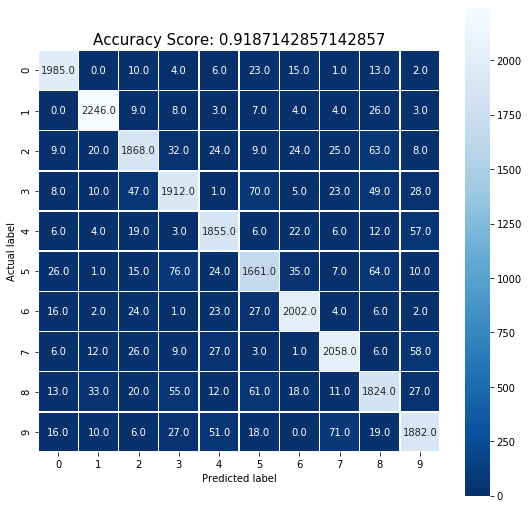

In [67]:
#8. sns.heatmap 함수를 활용하여 다음과 같이 Confusion matrix를 시각화하라.
#Hint: 다음의 코드를 활용
plt.figure(figsize=(9,9))
sns.heatmap(data, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 1.0, 'Accuracy Score: 0.9187142857142857')

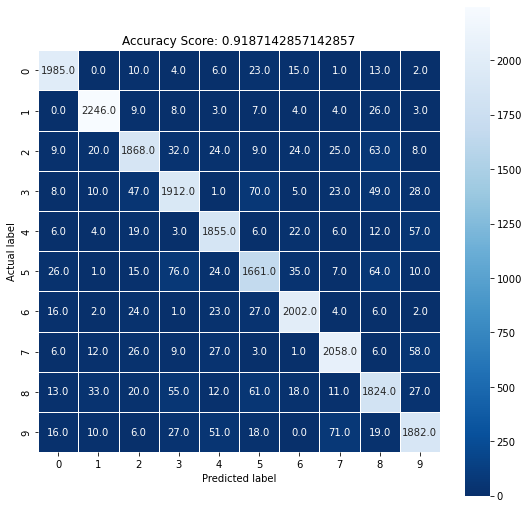

In [39]:
#8. your code here
conf_mtrx = confusion_matrix(test_lbl, y_test_pred)
acc_for_test = accuracy_score(test_lbl, y_test_pred)
plt.figure(figsize=(9,9))
sns.heatmap(conf_mtrx, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'Accuracy Score: {acc_for_test}')

In [13]:
#9. test set에 대해서 오분류된 이미지와 정분류된 대한 index를 각각 추출하여 임의로 5개를 출력하라.
#Hint :
from random import sample

index = 0
misclassifiedIndexes = []
wellclassifiedIndexes = []
for label, predict in zip(test_lbl, y_test_pred):
    #Complete the code here

    
sampled_misclass = sample(misclassifiedIndexes, 5)
sampled_wellclass = sample(wellclassifiedIndexes, 5)

print("Idx_misclassified :", sampled_misclass)
print("Idx_wellclassified :", sampled_wellclass)

Idx_misclassified : [7, 12, 17, 22, 31]
Idx_wellclassified : [0, 1, 2, 3, 4]


In [46]:
#9. your code here
misclassifiedIndexes = []
wellclassifiedIndexes = []
for idx, (label, predict) in enumerate(zip(test_lbl, y_test_pred)):
    #Complete the code here
    if label == predict:
        wellclassifiedIndexes.append(idx)
    else:
        misclassifiedIndexes.append(idx)

sampled_misclass = sample(misclassifiedIndexes, 5)
sampled_wellclass = sample(wellclassifiedIndexes, 5)

print("Idx_misclassified :", sampled_misclass)
print("Idx_wellclassified :", sampled_wellclass)

Idx_misclassified : [11724, 13790, 12982, 15932, 19789]
Idx_wellclassified : [11924, 11000, 7652, 1660, 6652]


In [49]:
print(misclassifiedIndexes[:5])
print(wellclassifiedIndexes[:5])

[7, 12, 17, 22, 31]
[0, 1, 2, 3, 4]


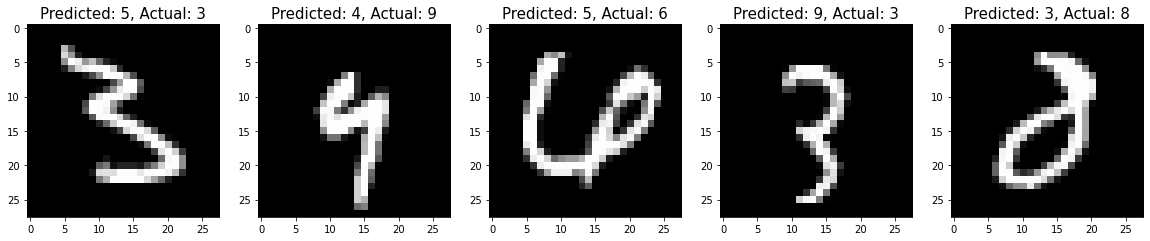

In [50]:
#10. 오분류된 이미지를 다음과 같이 5개 출력하라. 
#Hint: 4번 코드와 9번의 sampled index 정보 활용
plt.figure(figsize=(20,4))
for idx, miss in enumerate(misclassifiedIndexes):
    if idx > 4:
        break
    plt.subplot(1, 5, idx + 1)
    plt.imshow(np.reshape(test_img[miss], (28,28)), cmap=plt.cm.gray)
    plt.title(f'Predicted: {y_test_pred[miss]}, Actual: {test_lbl[miss]}', fontsize = 15)

Examples of well-clasified image


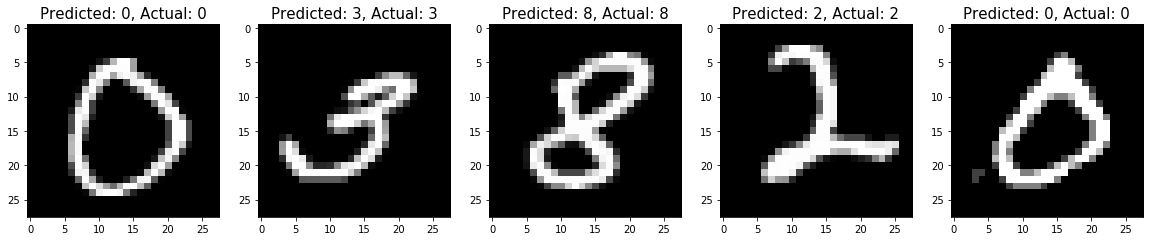

In [78]:
#11. 정분류된 이미지를 다음과 같이 5개 출력하라.
#Hint: 4번 코드와 9번의 sampled index 정보 활용

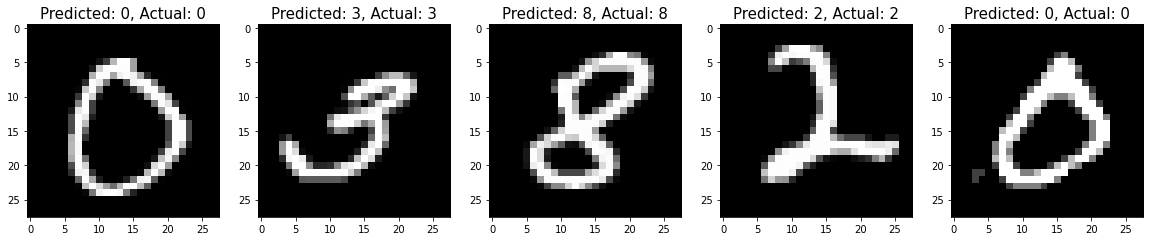

In [51]:
plt.figure(figsize=(20,4))
for idx, miss in enumerate(wellclassifiedIndexes):
    if idx > 4:
        break
    plt.subplot(1, 5, idx + 1)
    plt.imshow(np.reshape(test_img[miss], (28,28)), cmap=plt.cm.gray)
    plt.title(f'Predicted: {y_test_pred[miss]}, Actual: {test_lbl[miss]}', fontsize = 15)